In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout

In [3]:
df = pd.read_csv("/content/1.ushape.csv", header = None)

In [4]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [5]:
df[2].value_counts(normalize=True) # there is no imbalance

0.0    0.5
1.0    0.5
Name: 2, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [7]:
df.describe(include='all')

,0,1,2
count,100.000000,100.000000,100.000000
mean,0.500420,0.228701,0.500000
std,0.891044,0.592885,0.502519
min,-1.318500,-1.035702,0.000000
25%,-0.140330,-0.203260,0.000000
50%,0.470678,0.188660,0.500000
75%,1.112008,0.658448,1.000000
max,2.181372,1.571899,1.000000


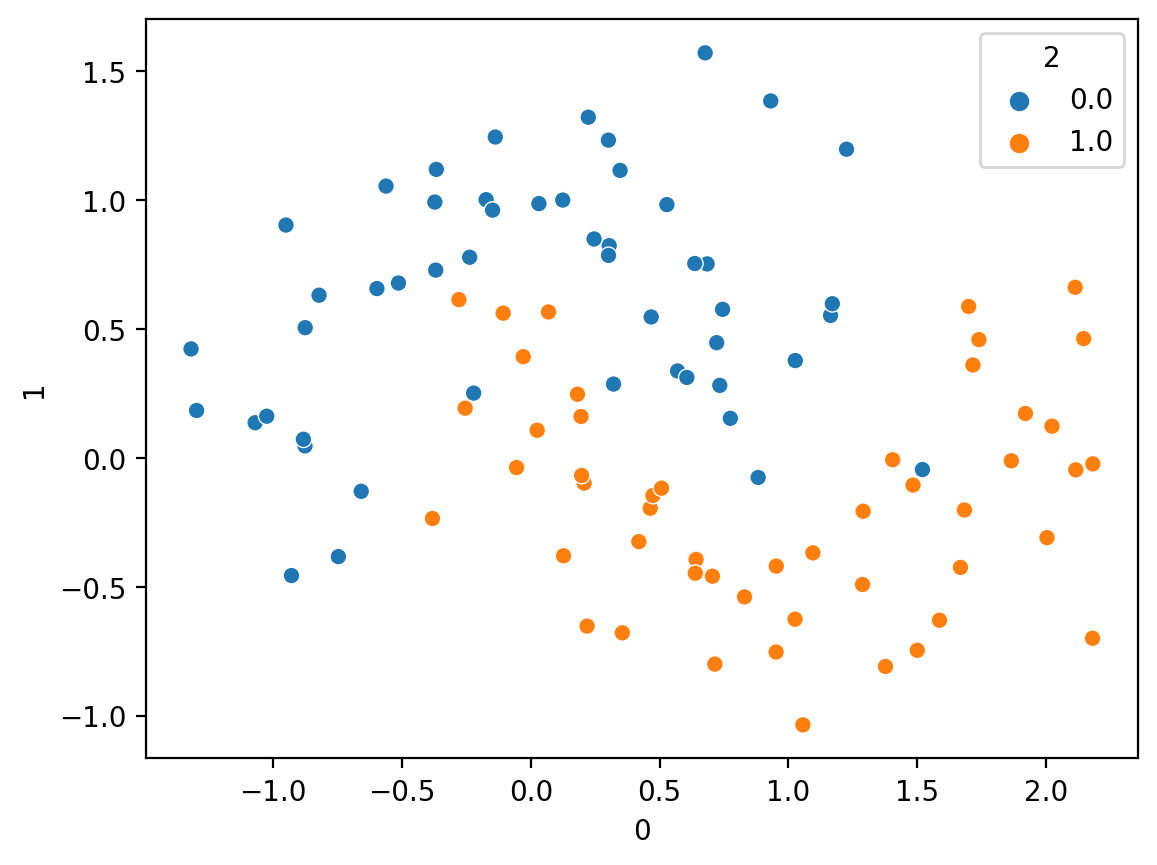

In [9]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

In [13]:
X = df[[0,1]]
y=df[2]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
#stratify to preserve the ratio to balance the data

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_trns=sc.fit_transform(X_train)

In [16]:
X_test_trns = sc.transform(X_test)

In [85]:
model = Sequential()
model.add(Dense(6,activation='tanh',kernel_initializer = 'glorot_normal', input_dim = 2))
model.add(Dense(5,activation='tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(4,activation='tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(2,activation='tanh',kernel_initializer = 'glorot_normal'))
model.add(Dense(1,activation='sigmoid'))
#random_uniform
#random_normal
#glorot_normal
#glorot_uniform
#he_normal
#he_uniform

In [87]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 6)                 18        
                                                                 
 dense_16 (Dense)            (None, 5)                 35        
                                                                 
 dense_17 (Dense)            (None, 4)                 24        
                                                                 
 dense_18 (Dense)            (None, 2)                 10        
                                                                 
 dense_19 (Dense)            (None, 1)                 3         
                                                                 
Total params: 90
Trainable params: 90
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [89]:
history = model.fit(X_train_trns,y_train,epochs = 250,validation_split = 0.2 )

Epoch 1/250
2/2 [==============================] - 1s 219ms/step - loss: 0.7086 - accuracy: 0.5156 - val_loss: 0.6642 - val_accuracy: 0.6250
Epoch 2/250
2/2 [==============================] - 0s 48ms/step - loss: 0.7038 - accuracy: 0.5469 - val_loss: 0.6617 - val_accuracy: 0.6250
Epoch 3/250
2/2 [==============================] - 0s 47ms/step - loss: 0.6993 - accuracy: 0.5625 - val_loss: 0.6584 - val_accuracy: 0.6875
Epoch 4/250
2/2 [==============================] - 0s 47ms/step - loss: 0.6948 - accuracy: 0.5781 - val_loss: 0.6555 - val_accuracy: 0.6875
Epoch 5/250
2/2 [==============================] - 0s 47ms/step - loss: 0.6909 - accuracy: 0.6250 - val_loss: 0.6525 - val_accuracy: 0.7500
Epoch 6/250
2/2 [==============================] - 0s 52ms/step - loss: 0.6865 - accuracy: 0.6250 - val_loss: 0.6491 - val_accuracy: 0.8125
Epoch 7/250
2/2 [==============================] - 0s 31ms/step - loss: 0.6822 - accuracy: 0.6094 - val_loss: 0.6460 - val_accuracy: 0.8750
Epoch 8/250
2/2 [==

In [91]:
Y_cap = model.predict(X_test_trns)

1/1 [==============================] - 0s 94ms/step


In [92]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [93]:
Y_cap_f

array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1]])

In [94]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.85

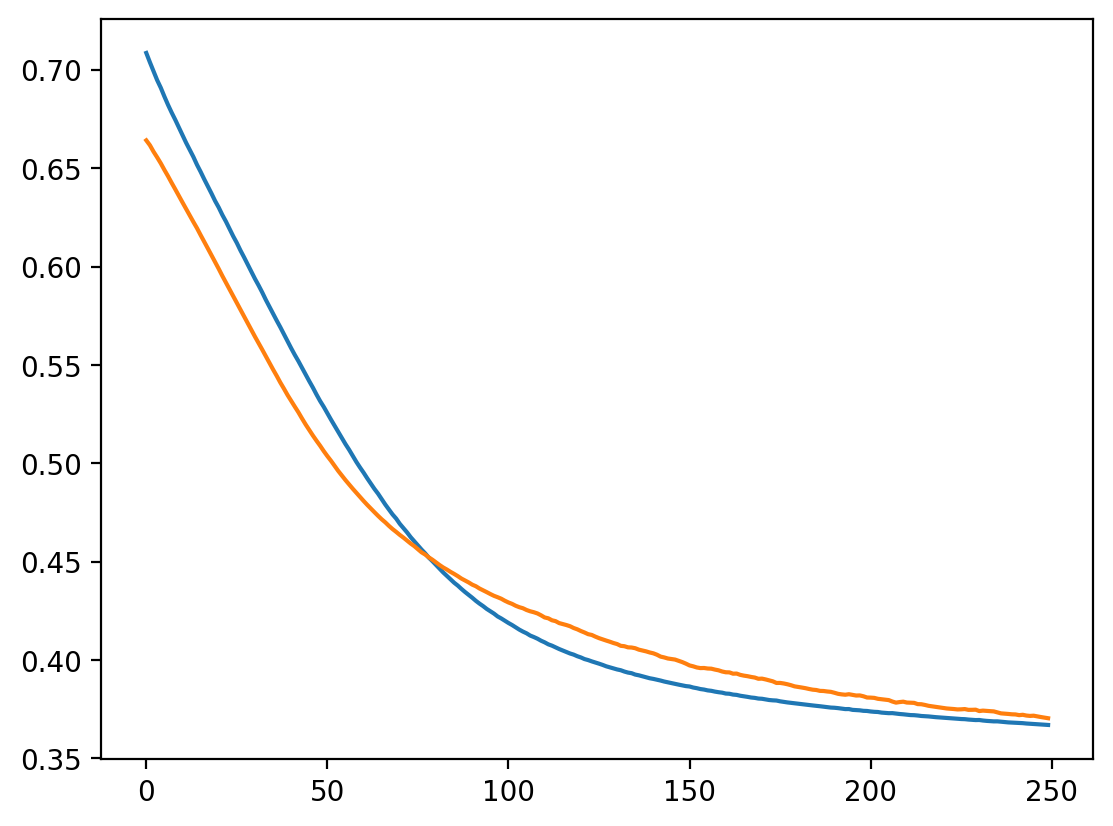

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [82]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 13s 1ms/step


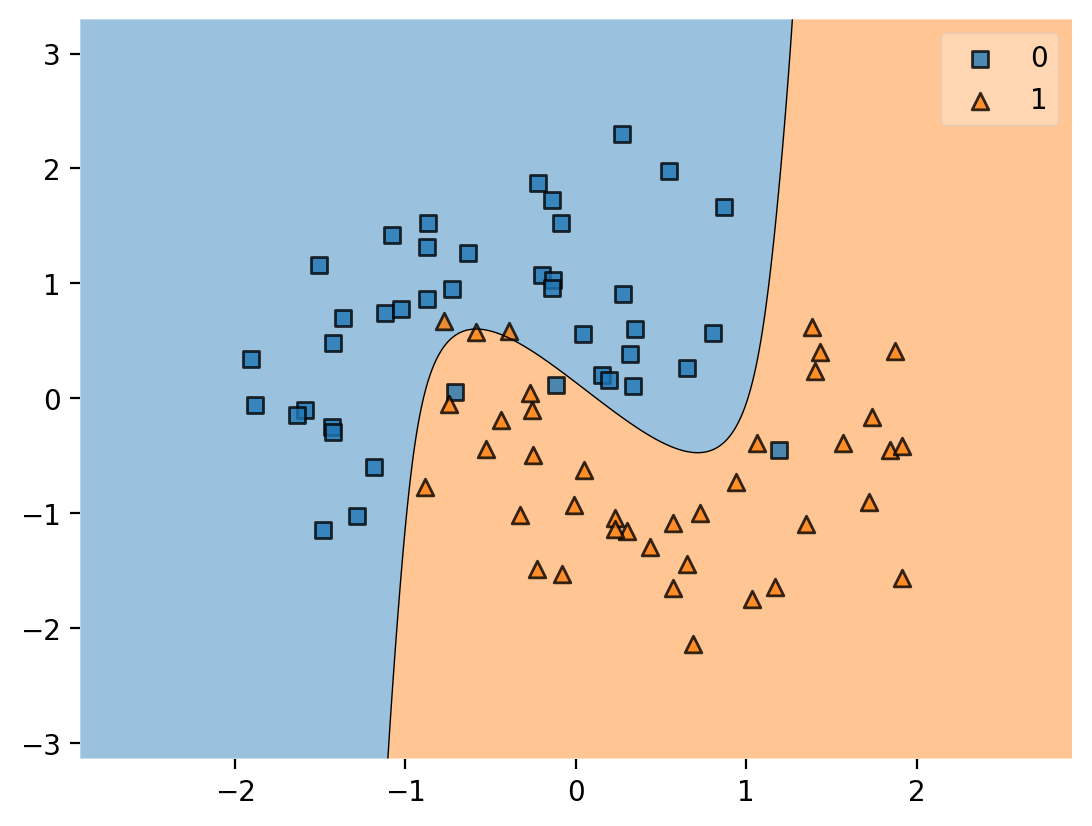

In [83]:
plot_decision_regions(X_train_trns, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 13s 1ms/step


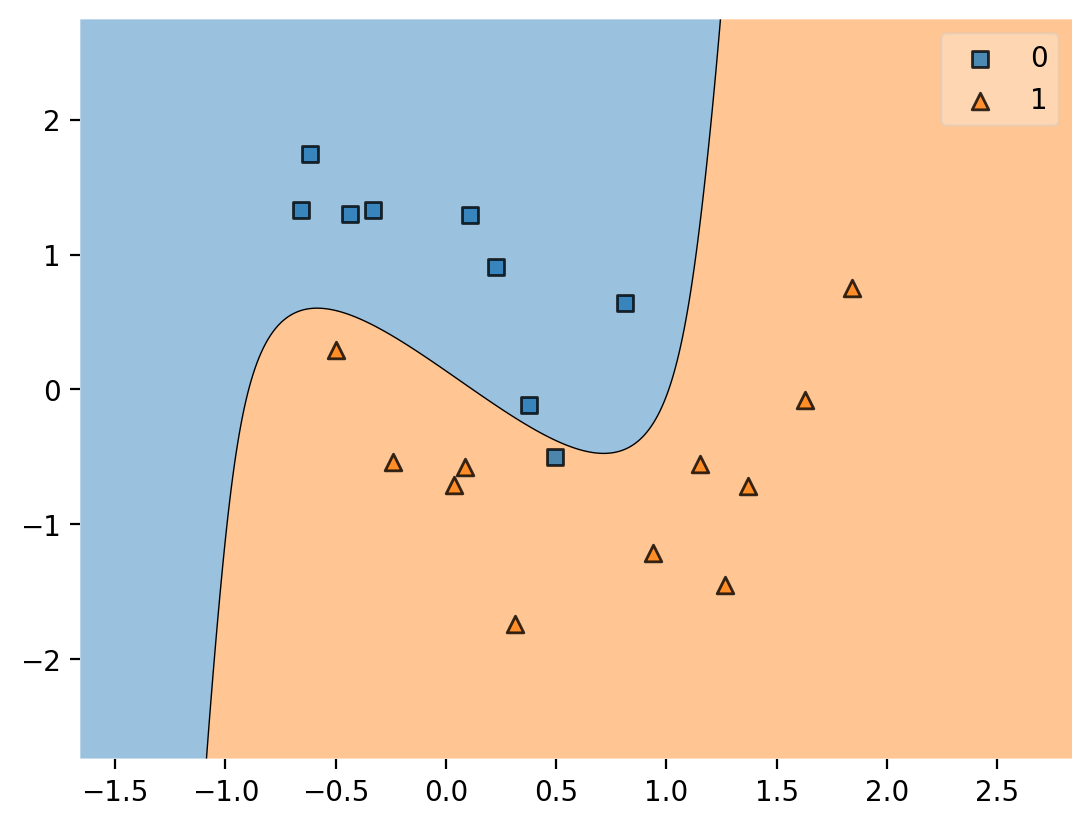

In [84]:
plot_decision_regions(X_test_trns, y_test.values.astype(int), clf = model);